In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

In [3]:
# load model
module = hub.load("https://tfhub.dev/intel/midas/v2_1_small/1", tags=['serve'])

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [5]:
from utils.eval import *

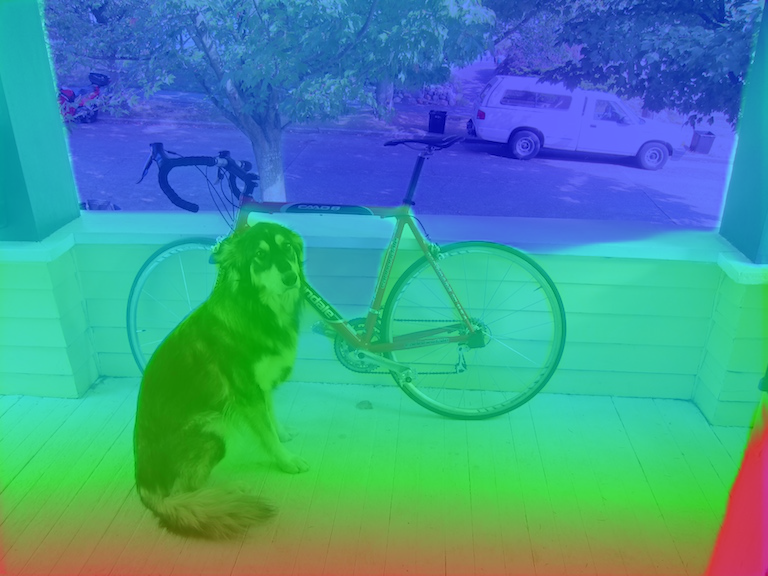

<Figure size 576x576 with 0 Axes>

In [9]:
img = cv2.imread('images/dog.jpg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
pltPredOnImg(module, rgb_img)

In [ ]:
import time
import imageio

cap = cv2.VideoCapture("images/person_dog.mp4")
number_of_frame = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
imgs = []
for i in tqdm(range(number_of_frame)):
    if i%2 != 0:
        continue
    return_value, image = cap.read()
    rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    overlap = pltPredOnImg(module, rgb_img, plot_img=False)
    overlap = overlap.resize((overlap.size[0]//3, overlap.size[1]//3))
    imgs.append(overlap)
del(cap)

out_gif = "images/person_dog.gif"
imgs[0].save(out_gif, format='GIF',
             append_images=imgs[1:],
             save_all=True, loop=0)

gif = imageio.mimread(out_gif, memtest=False)
imageio.mimsave(out_gif, gif, fps=45)

100%|████████████████████████████████████████████████████████████████████████████████| 371/371 [01:09<00:00,  5.34it/s]
